In [1]:
import py21cmcast as p21c
import numpy as np 

from astropy import units

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

%load_ext autoreload
%autoreload 2

/home/users/g/f/gfacchin/exo21cmFAST_release/exo21cmFAST/src/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/users/g/f/gfacchin/exo21cmFAST_release/exo21cmFAST/src/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
z_bins, k_bins = p21c.define_grid_modes_redshifts(6., 8 * units.MHz, z_max = 22, k_min = 0.1 / units.Mpc, k_max = 1 / units.Mpc)
print("The redshift bin edges are:", z_bins)
print("The mode bin edges are:", k_bins)

fiducial = p21c.Fiducial("/scratch/ulb/physth_fi/gfacchin/runs_21cmCAST/runs/CONSTRAINT_BKR_ELECTRON", z_bins, k_bins, False, load=True)
fiducial.observation = 'HERA'


The redshift bin edges are: [ 6.          6.28730456  6.5992025   6.93899281  7.31059216  7.71868653
  8.16892985  8.66820756  9.22499121  9.84982306 10.55599    11.36047883
 12.28536057 13.35984643 14.62342929 16.13084378 17.96020444 20.22698157]
The mode bin edges are: [0.1        0.15329426 0.20658851 0.25988277 0.31317703 0.36647129
 0.41976554 0.4730598  0.52635406 0.57964831 0.63294257 0.68623683
 0.73953109 0.79282534 0.8461196  0.89941386 0.95270811] 1 / Mpc


In [3]:
parameters = ['F_STAR10', 'ALPHA_STAR', 'F_ESC10', 'ALPHA_ESC',  'M_TURN', 't_STAR', 'L_X', 'NU_X_THRESH']
#parameters = ['F_STAR10', 'F_STAR7_MINI', 'ALPHA_STAR', 'ALPHA_STAR_MINI',  't_STAR', 'F_ESC10', 'F_ESC7_MINI', 'ALPHA_ESC', 'L_X', 'L_X_MINI', 'NU_X_THRESH']

params = [None] * len(parameters)

for iname, name in enumerate(parameters) :  
    params[iname] = p21c.Parameter(fiducial=fiducial, name=name, verbose = False, plot = False, load=True)

Treating parameter F_STAR10
Treating parameter ALPHA_STAR
Treating parameter F_ESC10
Treating parameter ALPHA_ESC
Treating parameter M_TURN
Treating parameter t_STAR
Treating parameter L_X
Treating parameter NU_X_THRESH


In [4]:
gamma_arr        = [1e-36, 1e-35, 1e-34, 1e-33, 1e-32, 1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26, 1e-25, 1e-24, 1e-23]
#l10_mass_str_arr = ['2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '5.5', '6.0', '6.5', '7.0', '7.5', '8.0', '8.5', '9.0', '9.5', '10.0', '10.5', '11.0', '11.5', '12.0']
l10_mass_str_arr = ['6.25', '6.5', '6.75', '7.0', '7.25', '7.5', '7.75', '8.0', '8.25', '8.5', '8.75', '9.0', '9.25', '9.5', '9.75', '10.0', '10.25','10.5', '10.75', '11.0', '11.25', '11.5', '11.75', '12.0']
l10_mass_arr     = [np.float(l10_mass_str) for l10_mass_str in  l10_mass_str_arr]

extra_params = np.full(shape=(len(l10_mass_arr), len(gamma_arr)), fill_value=None)

for im, l10_mass_str in enumerate(l10_mass_str_arr): 
    for ig, gamma in enumerate(gamma_arr):    
        try: 
            extra_params[im, ig] = p21c.Parameter(fiducial=fiducial, name='DM_DECAY_RATE', verbose = False, plot=False, load=True, add_name = 'm' + l10_mass_str, values = gamma)
        except IndexError:
            extra_params[im, ig] = None        

 py21cmcast/3138930004.py:4: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations (DeprecationWarning)


Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECA

In [5]:
fiducial.frac_noise = 0.2

sigma_gamma  = np.zeros(shape=(len(l10_mass_arr), len(gamma_arr)))

for im, l10_mass_str in enumerate(l10_mass_str_arr): 
    for ig, gamma in enumerate(gamma_arr) : 
        if extra_params[im, ig] is not None:
            fisher_matrix     = p21c.evaluate_fisher_matrix([*params, extra_params[im, ig]])
            covariance_matrix = np.linalg.inv(fisher_matrix['matrix'])
            sigma_gamma[im, ig] = np.sqrt(covariance_matrix[-1][-1])

sigma_gamma[sigma_gamma == 0] = np.nan

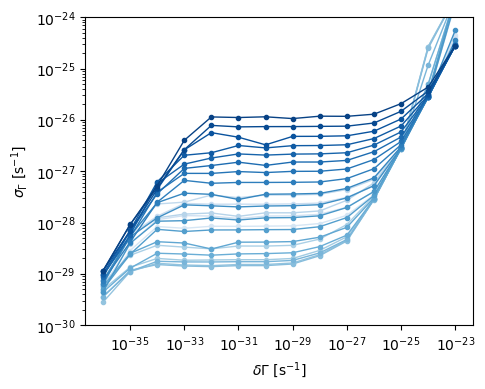

In [80]:
%matplotlib inline

import matplotlib
cmap = matplotlib.cm.get_cmap('Blues')


N = len(l10_mass_str_arr)
color = [cmap((i+5)/(N+6)) for i in range(0, N+1)]

fig, ax = p21c.prepare_plot(ylog=True, xlog=True, xlabel=r'$\delta \Gamma ~ [{\rm s^{-1}}]$', ylabel=r'$\sigma_\Gamma ~ [{\rm s^{-1}}]$')
for im, l10_mass_str in enumerate(l10_mass_str_arr): 
    ax.plot(gamma_arr, sigma_gamma[im, :], marker='o', linestyle = '-', color=color[im], linewidth=1, markersize=3)

#ax.plot(gamma_arr, sigma_gamma[-5, :], marker='o', linestyle = '-', color=color[im], linewidth=1, markersize=3) 
ax.set_ylim([1e-30, 1e-24])

fig.savefig('/home/ulb/physth_fi/gfacchin/exo21cmFAST_release/21cmCAST/scripts/figures_paper/constraint_vs_derivative_step.pdf', bbox_inches='tight')


In [7]:
1/(2*sigma_gamma[:, 7])

array([5.79623517e+27, 3.69727145e+27, 2.16646084e+27, 1.44997196e+27,
       3.22718763e+27, 1.38814845e+28, 2.50117258e+28, 3.06011727e+28,
       3.20877649e+28, 2.73027144e+28, 1.93692658e+28, 1.17369255e+28,
       6.83712021e+27, 3.99571073e+27, 2.34749042e+27, 1.38611948e+27,
       8.21616455e+26, 5.02595501e+26, 3.30891769e+26, 2.31856592e+26,
       1.58776625e+26, 1.04665359e+26, 6.74405267e+25, 4.70919636e+25])

In [62]:
#l10_mass_str_arr = ['2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '5.5', '6.0', '6.5', '7.0', '7.5', '8.0', '8.5', '9.0', '9.5', '10.0', '10.5', '11.0', '11.5', '12.0']
#l10_mass_arr = [np.float(l10_mass_str) for l10_mass_str in  l10_mass_str_arr]
#gamma_array  = [1e-36, 1e-35, 1e-34, 1e-33, 1e-32, 1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26, 1e-25, 1e-24, 1e-23]
#
#for im, l10_mass in enumerate(l10_mass_arr):
#    primary = 'phot_delta' if l10_mass <= np.log10(5e+9) else 'gamma'
#    p21c.make_config_one_varying_param("../config/constraint_bkr.config", 'DM_DECAY_RATE', gamma_array , mod_astro_params = {'DM_LOG10_MASS' : l10_mass},  mod_flag_options = {'DM_PRIMARY' : primary}, add_file_name= 'm' + l10_mass_str_arr[im])

 py21cmcast/3035987679.py:2: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations (DeprecationWarning)


0.12664712854871557
[1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26] 8.0


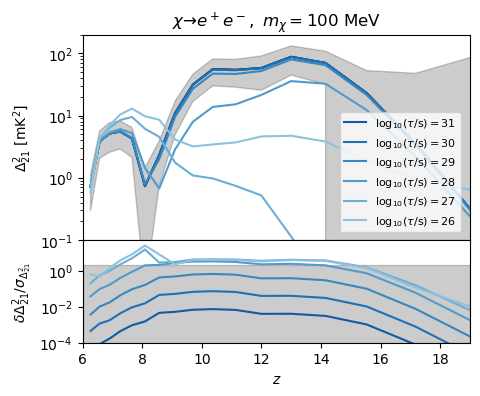

In [82]:
fig, (ax1, ax2) = p21c.prepare_2subplots(ylog_1=True, ylog_2=True, xlog=False, xlabel=r'$z$', ylabel_1=r'$\Delta_{21}^2~{\rm [mK^2]}$', 
                                        ylabel_2=r'$\delta \Delta_{21}^2/\sigma_{\Delta_{21}^2}$', ylim_1=[1e-1, 2e+2], xlim=[6, 19], ylim_2 = [1e-4, 5e+1],
                                        gridspec_kw={'height_ratios': [2, 1],'hspace': 0})

z_arr    = fiducial.z_array
ps_fid   = np.array([ps[0] for ps in fiducial.power_spectrum])
ps_exp_noise = np.array([noise[0] for noise in fiducial.ps_exp_noise])
ps_poi_noise = np.array([noise[0] for noise in fiducial.ps_poisson_noise])
ps_noise     = np.sqrt(ps_exp_noise**2 + ps_poi_noise**2 + (ps_fid*0.20)**2)

print(fiducial.k_array[0])

ax1.plot(z_arr, ps_fid, 'k-')
ax1.fill_between(z_arr, ps_fid - 2*ps_noise, ps_fid+2*ps_noise, color='k', alpha=0.2)

index_gamma = [5, 6, 7, 8, 9, 10]
N = len(index_gamma)
gamma_display = [gamma_arr[i] for i in index_gamma]
color = [cmap((i+5)/(N+6)) for i in range(0, N+1)]

print(gamma_display, l10_mass_arr[7])

for i, idg in enumerate(index_gamma):
    ps_decay = np.array([ps[0] for ps in extra_params[7, idg]._runs[0].power_spectrum])
    ax1.plot(z_arr, ps_decay, color=color[N-i-1], label = r'$\log_{{10}} (\tau/{{\rm s}}) = {:.0f}$'.format(-np.log10(gamma_display[i])))
    ax2.plot(z_arr, np.abs(ps_decay - ps_fid)/ps_noise, color=color[N-i-1])

ax2.axhspan(1e-4, 2, color='k', alpha=0.2, zorder=0)
ax1.legend(loc='lower right', bbox_to_anchor=(0.99,0.01), fontsize=8)
ax1.set_title(r'$\chi \to e^+e^-, ~ m_\chi = 100 ~{\rm MeV}$')

fig.savefig('/home/ulb/physth_fi/gfacchin/exo21cmFAST_release/21cmCAST/scripts/figures_paper/PS_e_m100MeV_vs_z.pdf', bbox_inches='tight')
